In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
import utils
from utils import Map, Node, MakePath,  Draw, SimpleTest, MassiveTest
from JPS import GetDirection, GetJumpPoint, CheckJumpPoint, traversable, GetNeighbours, JPS
%matplotlib inline
EPS = 0.000001

In [2]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 13
jGoal = 28
pathLen = 31.9705627

Path found! Length: 31.970562748477143. Nodes created: 11. Number of steps: 8. Correct: True
CPU times: user 30.8 ms, sys: 2.72 ms, total: 33.5 ms
Wall time: 32.6 ms


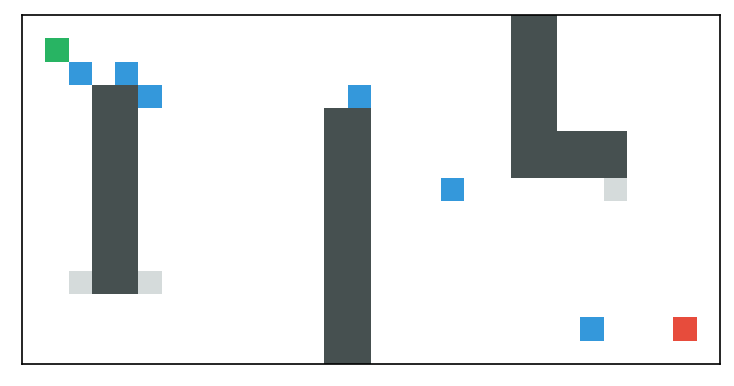

In [3]:
%time SimpleTest(JPS, height, width, mapstr, iStart, jStart, iGoal, jGoal, pathLen)

In [4]:
%time MassiveTest(JPS)

h: 537.9310242291881. Nodes created: 2299. Number of steps: 2263. Correct: False
537.9310242291881 543.78888855
Path found! Length: 537.2619766708758. Nodes created: 2190. Number of steps: 2153. Correct: False
537.2619766708758 542.53405456
Path found! Length: 534.742207411231. Nodes created: 1958. Number of steps: 1879. Correct: False
534.742207411231 540.01428528
Path found! Length: 536.7594513539343. Nodes created: 2322. Number of steps: 2279. Correct: False
536.7594513539343 541.4457428
Path found! Length: 538.4751801064723. Nodes created: 2010. Number of steps: 1967. Correct: False
538.4751801064723 543.16147156
Path found! Length: 540.8893936688453. Nodes created: 1835. Number of steps: 1803. Correct: False
540.8893936688453 545.57568512
Path found! Length: 543.9604614807107. Nodes created: 1751. Number of steps: 1714. Correct: False
543.9604614807107 547.47518005
Path found! Length: 539.4335495461296. Nodes created: 2290. Number of steps: 2273. Correct: False
539.4335495461296 5

275.88225099390854,
  274.69343417595184,
  279.20815280171314,
  278.1665222413705,
  280.4386001800126,
  282.1076477383248,
  280.29646455628165,
  282.82337649086287,
  278.8528137423857,
  278.7645019878172,
  282.2081528017131,
  277.35028842544403,
  284.9655121145938,
  279.2792206135787,
  282.936074863071,
  283.3502884254442,
  283.6518036156091,
  282.06601717798225,
  283.3919189857868,
  283.5512985522207,
  285.651803615609,
  281.2670273047588,
  285.0071426749365,
  289.53910524340097,
  288.3208511739212,
  285.6934341759518,
  285.8650070512055,
  288.379725676967,
  287.9655121145938,
  289.1076477383247,
  286.66399692442894,
  288.76450198781725,
  292.3502884254441,
  291.3502884254441,
  292.22034611053294,
  293.05382386916256,
  291.45079348883235,
  290.89444430272835,
  293.078210486802,
  291.4386001800126,
  292.2914139223983,
  291.3086578651015,
  297.35028842544415,
  294.7939392393401,
  295.4213562373096,
  297.17871555019036,
  292.9238815542512,
  2